## 신경망 개요
# 텐서플로-선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.12.0'

In [4]:
sess = tf.InteractiveSession()

### 아이리스 데이터 적용
- 입력값 : petal length
- 목표값 : petal width

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
X = tf.constant(iris.data[:,2], dtype=tf.float32)
y = tf.constant(iris.data[:,3], dtype=tf.float32)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

pred_y = w*X + b
mse = tf.reduce_mean(tf.square(y-pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(3000):
    sess.run(train_op)
    mse_val = mse.eval()
    costs.append(mse_val)
    if i%300==0: print(i, mse_val, w.eval(), b.eval())
        
print(i, mse_val, w.eval(), b.eval())

0 3.3202965 0.004323408 -0.47675267
300 0.042297773 0.41787446 -0.3731151
600 0.04229094 0.41693884 -0.36887124
900 0.042290077 0.41660473 -0.36735582
1200 0.04228997 0.41648543 -0.36681473
1500 0.04228995 0.41644284 -0.3666216
1800 0.042289954 0.4164276 -0.36655253
2100 0.04228995 0.41642213 -0.3665276
2400 0.04228995 0.41642022 -0.36651888
2700 0.04228995 0.41642022 -0.36651888
2999 0.04228995 0.41642022 -0.36651888


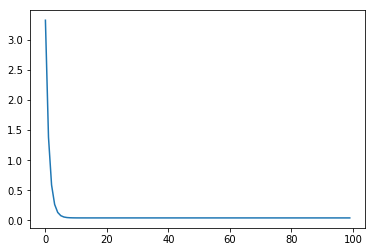

In [15]:
plt.plot(costs[:100])

In [16]:
w.eval(), b.eval()

(0.41642022, -0.36651888)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(iris.data[:,[2]], iris.data[:,3])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
model.coef_, model.intercept_

(array([0.41641913]), -0.3665140452167275)

- 입력값 : sepal_length, sepal_width, petal_length
- 목표값 : petal_width

In [12]:
X = tf.constant(iris.data[:,:3], dtype=tf.float32)
y = tf.constant(iris.data[:,[3]], dtype=tf.float32)

w = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([]))

pred_y = X@w + b
mse = tf.reduce_mean(tf.square(y-pred_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    sess.run(train_op)
    mse_val = mse.eval()
    costs.append(mse_val)
    if i%1000==0: print(i, mse_val, w.eval().ravel(), b.eval())
        
print(i, mse_val, w.eval().ravel(), b.eval())

0 3.409863 [ 0.5237504  -0.278171    0.42638376] -0.84944487
1000 0.041804906 [0.02315191 0.09568264 0.419405  ] -0.8086648
2000 0.038030036 [-0.08782681  0.21301448  0.47803605] -0.73889834
3000 0.037269585 [-0.12801963  0.24437423  0.497641  ] -0.6731657
4000 0.03688329 [-0.14628835  0.25081566  0.5054088 ] -0.6148952
5000 0.03661235 [-0.15719633  0.25029385  0.5094078 ] -0.56422806
6000 0.036412798 [-0.16516599  0.24805416  0.5120575 ] -0.5204549
7000 0.03626497 [-0.17160803  0.24559693  0.5141044 ] -0.4827201
8000 0.036155377 [-0.17703144  0.24332534  0.5157982 ] -0.45021555
9000 0.036074113 [-0.18166487  0.2413233   0.5172365 ] -0.4222234
10000 0.03601387 [-0.18564342  0.23958574  0.5184685 ] -0.39811927
11000 0.03596921 [-0.1890665   0.23808576  0.5195281 ] -0.37736353
12000 0.035936084 [-0.19201277  0.23679301  0.52043945] -0.35949138
13000 0.035911527 [-0.19454949  0.2356794   0.5212242 ] -0.34410208
14000 0.035893325 [-0.19673401  0.23472068  0.52190024] -0.33085126
15000 0.03

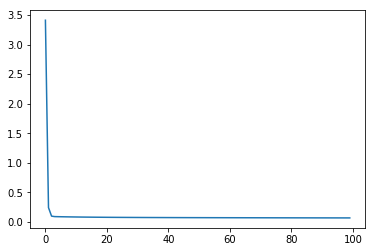

In [13]:
plt.plot(costs[:100])

In [14]:
model = LinearRegression()
model.fit(iris.data[:,:3], iris.data[:,3])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
model.coef_, model.intercept_

(array([-0.21027133,  0.22877721,  0.52608818]), -0.2487235860244572)

### 중간층 사용
- 중간층 뉴런 10개
- 중간층 활성화함수는 relu (tf.nn.relu() 사용)

In [19]:
X = tf.constant(iris.data[:,:3], dtype=tf.float32)
y = tf.constant(iris.data[:,[3]], dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([3,10]))
b1 = tf.Variable(tf.random.normal([10]))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([10,1]))
b2 = tf.Variable(tf.random.normal([1]))
pred_y = y1@w2 + b2

mse = tf.reduce_mean(tf.square(y-pred_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    sess.run(train_op)
    mse_val = mse.eval()
    costs.append(mse_val)
    if i%1000==0: print(i, mse_val)
        
print(i, mse_val)

0 0.4178059
1000 0.08331298
2000 0.037338004
3000 0.036182985
4000 0.035589296
5000 0.034951966
6000 0.0348397
7000 0.034606427
8000 0.03424811
9000 0.034237362
10000 0.03411053
11000 0.034033306
12000 0.034008373
13000 0.033997618
14000 0.033989716
15000 0.03394657
16000 0.033934172
17000 0.033923354
18000 0.033913556
19000 0.03390447
19999 0.03389598


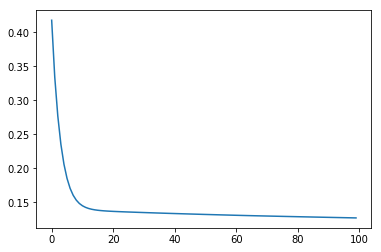

In [20]:
plt.plot(costs[:100])

### 중간층 2개 사용
- 중간층 뉴런 각각 5개씩
- 중간층 활성화함수는 relu

In [17]:
X = tf.constant(iris.data[:,:3], dtype=tf.float32)
y = tf.constant(iris.data[:,[3]], dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([3,5]))
b1 = tf.Variable(tf.random.normal([5]))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([5,5]))
b2 = tf.Variable(tf.random.normal([5]))
y2 = tf.nn.relu(y1@w2 + b2)

w3 = tf.Variable(tf.random.normal([5,1]))
b3 = tf.Variable(tf.random.normal([1]))
pred_y = y2@w3 + b3

mse = tf.reduce_mean(tf.square(y-pred_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(40000):
    sess.run(train_op)
    mse_val = mse.eval()
    costs.append(mse_val)
    if i%2000==0: print(i, mse_val)
        
print(i, mse_val)

0 3.859957
2000 0.036996946
4000 0.036414977
6000 0.036170088
8000 0.03605276
10000 0.035990782
12000 0.035955068
14000 0.035932627
16000 0.035917394
18000 0.03590622
20000 0.035897616
22000 0.03589065
24000 0.03588481
26000 0.035879757
28000 0.03587536
30000 0.035871547
32000 0.035868157
34000 0.035865173
36000 0.03586252
38000 0.035860136
39999 0.035858028


### 플레이스홀더 사용
- 입력값을 실행시 변경 가능

In [31]:
X = tf.placeholder(tf.float32, shape=[None,3])
y = tf.placeholder(tf.float32, shape=[None,1])

w1 = tf.Variable(tf.random.normal([3,5]))
b1 = tf.Variable(tf.random.normal([5]))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([5,5]))
b2 = tf.Variable(tf.random.normal([5]))
y2 = tf.nn.relu(y1@w2 + b2)

w3 = tf.Variable(tf.random.normal([5,1]))
b3 = tf.Variable(tf.random.normal([1]))
pred_y = y2@w3 + b3

mse = tf.reduce_mean(tf.square(y-pred_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    mse_val, _ = sess.run([mse, train_op], feed_dict={X: iris.data[:,:3],
                                                      y: iris.data[:,[3]]})
    costs.append(mse_val)
    if i%1000==0: print(i, mse_val)
        
print(i, mse_val)

0 17.780626
1000 0.070384726
2000 0.06734839
3000 0.06470116
4000 0.062378064
5000 0.06018357
6000 0.058120035
7000 0.05616834
8000 0.05432219
9000 0.052562986
10000 0.050814807
11000 0.04907027
12000 0.047398213
13000 0.04578906
14000 0.0442507
15000 0.042793453
16000 0.041429486
17000 0.040144145
18000 0.038940504
19000 0.03784235
19999 0.03685613
